## Gradient Descent

Gradient descent is a first-order iterative optimization algorithm for finding the minimum of a function. To find a local minimum of a function using gradient descent, one takes steps proportional to the negative of the gradient (or of the approximate gradient) of the function at the current point. If instead one takes steps proportional to the positive of the gradient, one approaches a local maximum of that function; the procedure is then known as gradient ascent.


repeat until convergence{
\begin{align}
\theta_j := \theta_j ={\color{blue}{\alpha}} \frac{\beta}{\beta \theta_j}\ J(\theta_0, \theta_1)\ \ 
( for j = 0 and j = 1) \\
\end{align}
}
\begin{align}
\color{blue}{\alpha} : Learning Rate
\end{align}




asd


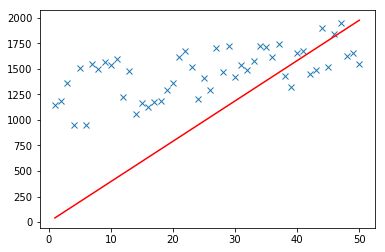


asd


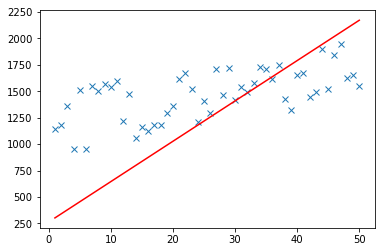


asd


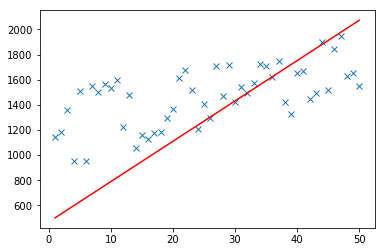


asd


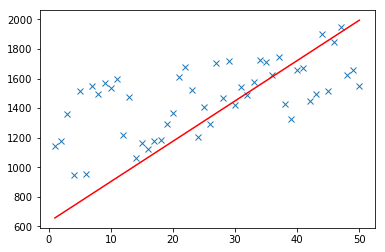


asd


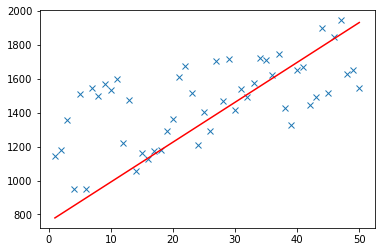


asd


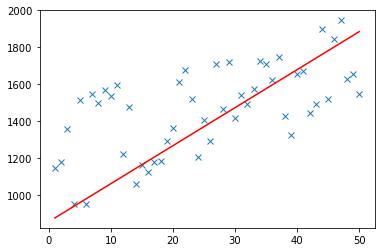


asd


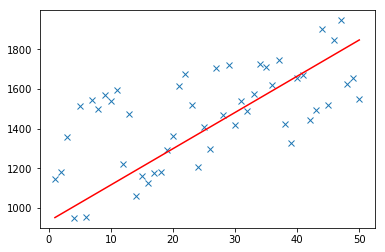


asd


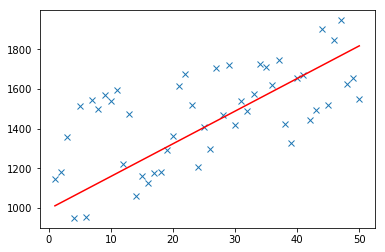


asd


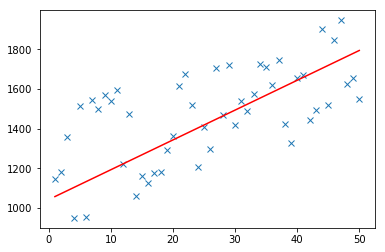


asd


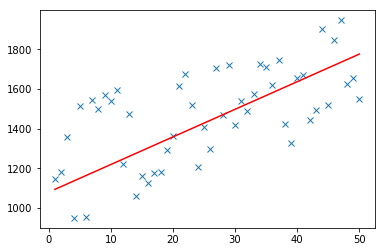

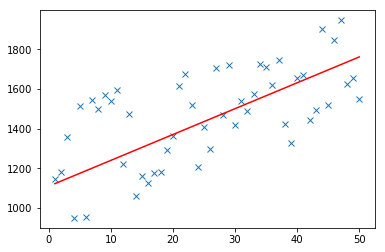

In [40]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import random

def generateSample(N, variance=100):
    X = np.matrix(range(N)).T + 1
    Y = np.matrix([random.random() * variance + i * 10 + 900 for i in range(len(X))]).T
    # T	Returns the transpose of the matrix.
    return X, Y

def fitModel_gradient(x, y):
    N = len(x)
    # we initilize the weight in here 
    w = np.zeros((x.shape[1], 1))
    # aka. learning rate
    eta = 0.001

    maxIteration = 10000
    for i in range(maxIteration):
        # x * w in here our guess. 
        # y is the real value
        error = x * w - y
        # gradient  
        gradient = x.T * error / N
        # w = weight. 
        w = w - eta * gradient
        if(i % 1000 == 0):
            input()
            plotModel(x, y, w)
    return w


def plotModel(x, y, w):
    plt.plot(x[:,1], y, "x")
    plt.plot(x[:,1], x * w, "r-")
    plt.show()
    
def test(N, variance, modelFunction):
    # generate sample data
    X, Y = generateSample(N, variance)
    # X is numeric numbers 1,2,3,4
    # Y is random value
    # lets convert it to matrix.
    # before [1] ....
    X = np.hstack([np.matrix(np.ones(len(X))).T, X])
    # after [[  1.   1.] ...
    w = modelFunction(X, Y)
    plotModel(X, Y, w)
    
    
test(50, 600, fitModel_gradient)